Here, we calculate allele sharing distances between all strains in the 1K yeast set, to later perform only the most distant crosses.

In [1]:
source("../BrusselSprouts/scripts/functions.R")

library(pegas)


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: ape

Registered S3 method overwritten by 'pegas':
  method      from
  print.amova ade4


Attaching package: 'pegas'


The following object is masked from 'package:ape':

    mst




In [2]:
vcf="~/data/TRD/1011Matrix.SNPs.var.GQ20.DP5.Miss10.vcf.gz"



In [3]:
asd_file=paste(vcf,".asd.dist",sep="")
sbatch_file="~/data/bruxellensis/mapping/ASD-all-Scev.sbatch"

if(!file.exists(asd_file))
    {
    sbatch=paste("#!/bin/bash
#SBATCH -p fast          # The account name for the job
#SBATCH --job-name=ASD  # The job name
#SBATCH -o ",dirname(vcf),"/scripts/logs/ASD2n-Scev.out
#SBATCH -e ",dirname(vcf),"/scripts/logs/ASD2n-Scev.err
#SBATCH -c 4                 # The number of cpu cores to use
#SBATCH --time=11:59:00       # The time the job will take to run 
#SBATCH --mem=16gb

date
. ~/activate.sh bwaetc

~/software/asd --vcf ",vcf," --multiallelic --out ",vcf," --threads 4


date
        ",sep="")
        print(sbatch_file)
        writeLines(sbatch, sbatch_file)
        print(system(command=paste("sbatch ",sbatch_file,sep=""),intern=TRUE))
}
while(!file.exists(asd_file)){
    Sys.sleep(5)
}

[1] "~/data/bruxellensis/mapping/ASD-all-Scev.sbatch"
[1] "Submitted batch job 259878"


In [4]:
asd=fread(asd_file, data.table=FALSE)
asd=asd[,-1]
head(asd)

Warning message in fread(asd_file, data.table = FALSE):
"Detected 1011 column names but the data has 1012 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file."


,AAA,AAB,AAC,AAD,AAE,AAG,AAH,AAI,AAK,AAL,⋯,SACE_YDF,SACE_YDG,SACE_YDH,SACE_YDI,SACE_YDJ,SACE_YDK,SACE_YDL,SACE_YDM,SACE_YDN,SACE_YDO
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.000000,0.014987,0.026482,0.048572,0.010528,0.034710,0.027379,0.005898,0.010919,0.021062,⋯,0.006822,0.024252,0.027100,0.043935,0.011335,0.048374,0.036458,0.011940,0.035008,0.006525
2,0.014987,0.000000,0.027908,0.045797,0.017127,0.035811,0.024691,0.014760,0.017264,0.024963,⋯,0.015104,0.027406,0.027760,0.042565,0.017638,0.045631,0.036666,0.019265,0.034742,0.015103
3,0.026482,0.027908,0.000000,0.040986,0.027678,0.038789,0.032350,0.026408,0.028006,0.028221,⋯,0.026348,0.032899,0.034311,0.041385,0.028119,0.040852,0.037787,0.030282,0.036582,0.026315
4,0.048572,0.045797,0.040986,0.000000,0.048934,0.036006,0.035674,0.048424,0.049225,0.040131,⋯,0.048099,0.037716,0.036382,0.029411,0.047216,0.014642,0.030422,0.051266,0.031242,0.048062
5,0.010528,0.017127,0.027678,0.048934,0.000000,0.035885,0.028723,0.010567,0.003269,0.023578,⋯,0.010695,0.026850,0.029093,0.044316,0.009250,0.048777,0.037789,0.015040,0.036235,0.010722
6,0.034710,0.035811,0.038789,0.036006,0.035885,0.000000,0.034797,0.034555,0.036152,0.034192,⋯,0.034473,0.034501,0.033350,0.036889,0.035346,0.035808,0.032042,0.038263,0.032310,0.034410


In [5]:
sample.id=colnames(asd)

In [6]:
ads_m=as.matrix(asd)

[1] 0.4638438 0.4753204

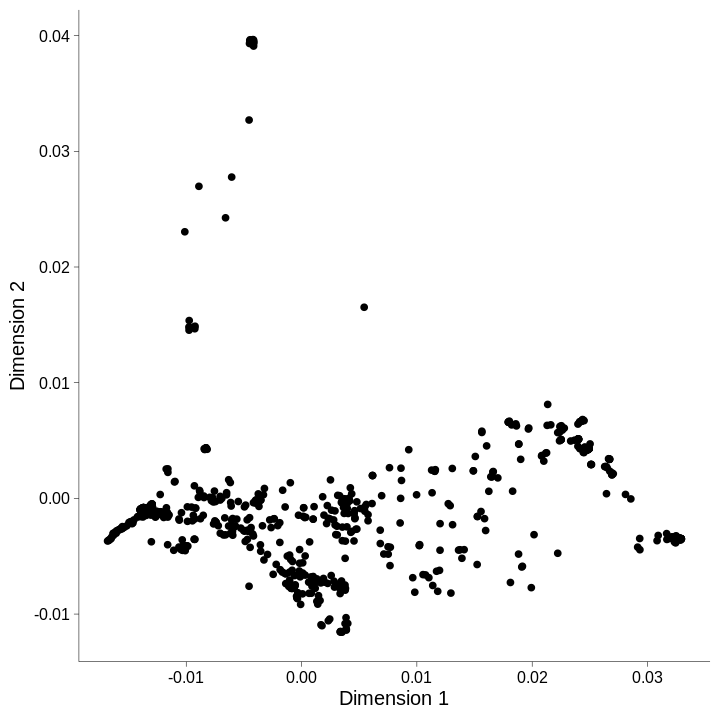

In [8]:
loc <- cmdscale(ads_m, k = 2, eig=TRUE)
x <- loc$points[, 1]; y <- loc$points[, 2]
source("../BrusselSprouts/scripts/MyTheme.R")

loc$GOF

options(repr.plot.width=6, repr.plot.height=6)



ggplot(mapping=aes(x,y))+
geom_point()+
xlab("Dimension 1")+
ylab("Dimension 2")+
my_theme()


In [9]:
library(ape)

GeneticDistance <- as.dist(ads_m)

options(repr.plot.width=10, repr.plot.height=10)



HC <- hclust(GeneticDistance, "ave")
phylo<-ape::bionjs(X = GeneticDistance)


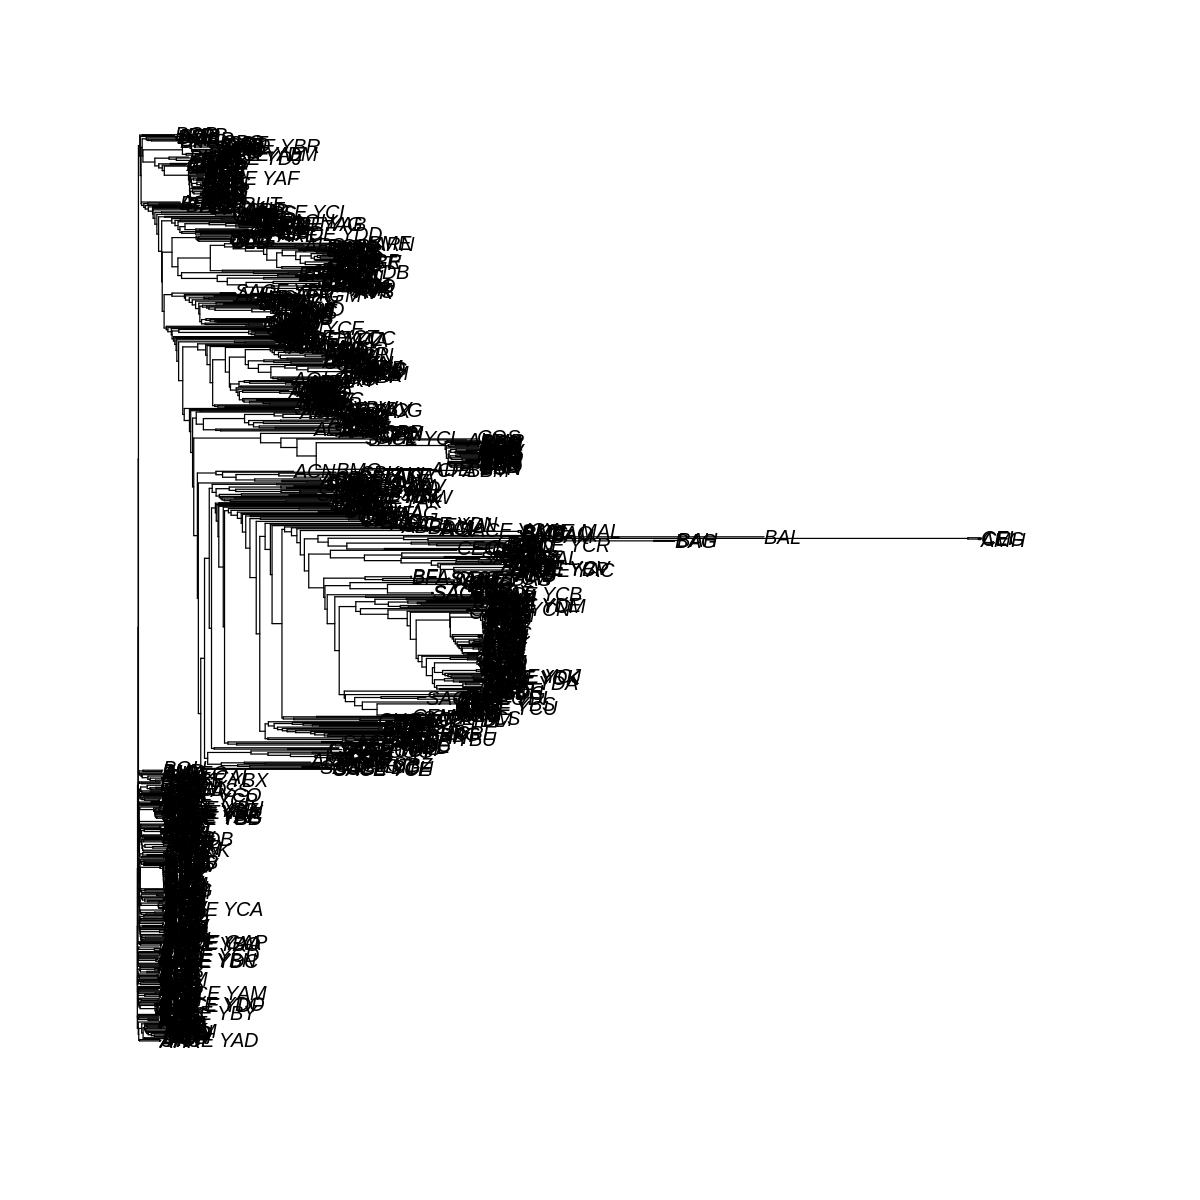

In [11]:
plot.phylo(phylo, type="phylogram")

# Choosing distant crosses

In [14]:
# ads vs previous measurement of the 8 Chris crosses
head(ads_m)

AAA,AAB,AAC,AAD,AAE,AAG,AAH,AAI,AAK,AAL,⋯,SACE_YDF,SACE_YDG,SACE_YDH,SACE_YDI,SACE_YDJ,SACE_YDK,SACE_YDL,SACE_YDM,SACE_YDN,SACE_YDO
0.000000,0.014987,0.026482,0.048572,0.010528,0.034710,0.027379,0.005898,0.010919,0.021062,⋯,0.006822,0.024252,0.027100,0.043935,0.011335,0.048374,0.036458,0.011940,0.035008,0.006525
0.014987,0.000000,0.027908,0.045797,0.017127,0.035811,0.024691,0.014760,0.017264,0.024963,⋯,0.015104,0.027406,0.027760,0.042565,0.017638,0.045631,0.036666,0.019265,0.034742,0.015103
0.026482,0.027908,0.000000,0.040986,0.027678,0.038789,0.032350,0.026408,0.028006,0.028221,⋯,0.026348,0.032899,0.034311,0.041385,0.028119,0.040852,0.037787,0.030282,0.036582,0.026315
0.048572,0.045797,0.040986,0.000000,0.048934,0.036006,0.035674,0.048424,0.049225,0.040131,⋯,0.048099,0.037716,0.036382,0.029411,0.047216,0.014642,0.030422,0.051266,0.031242,0.048062
0.010528,0.017127,0.027678,0.048934,0.000000,0.035885,0.028723,0.010567,0.003269,0.023578,⋯,0.010695,0.026850,0.029093,0.044316,0.009250,0.048777,0.037789,0.015040,0.036235,0.010722
0.034710,0.035811,0.038789,0.036006,0.035885,0.000000,0.034797,0.034555,0.036152,0.034192,⋯,0.034473,0.034501,0.033350,0.036889,0.035346,0.035808,0.032042,0.038263,0.032310,0.034410


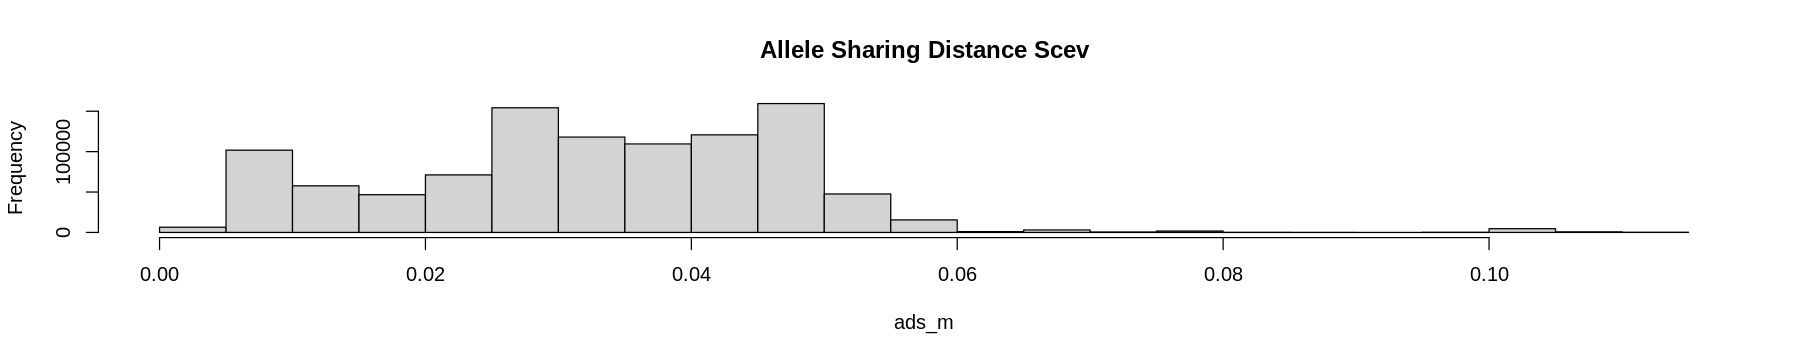

In [29]:
options(repr.plot.width=15, repr.plot.height=3)

hist(ads_m, main = "Allele Sharing Distance Scev")

,chris_genetic_distance,asd
,<dbl>,<dbl>
BFP,0.397219,0.013223
CMP,0.770140,0.025169
CPG,1.494822,0.048782
SACE_YCR,1.485543,0.047959
ACV,1.467193,0.048178
BAH,2.196443,0.070231
CGD,2.217678,0.071317
CEI,3.170451,0.099152


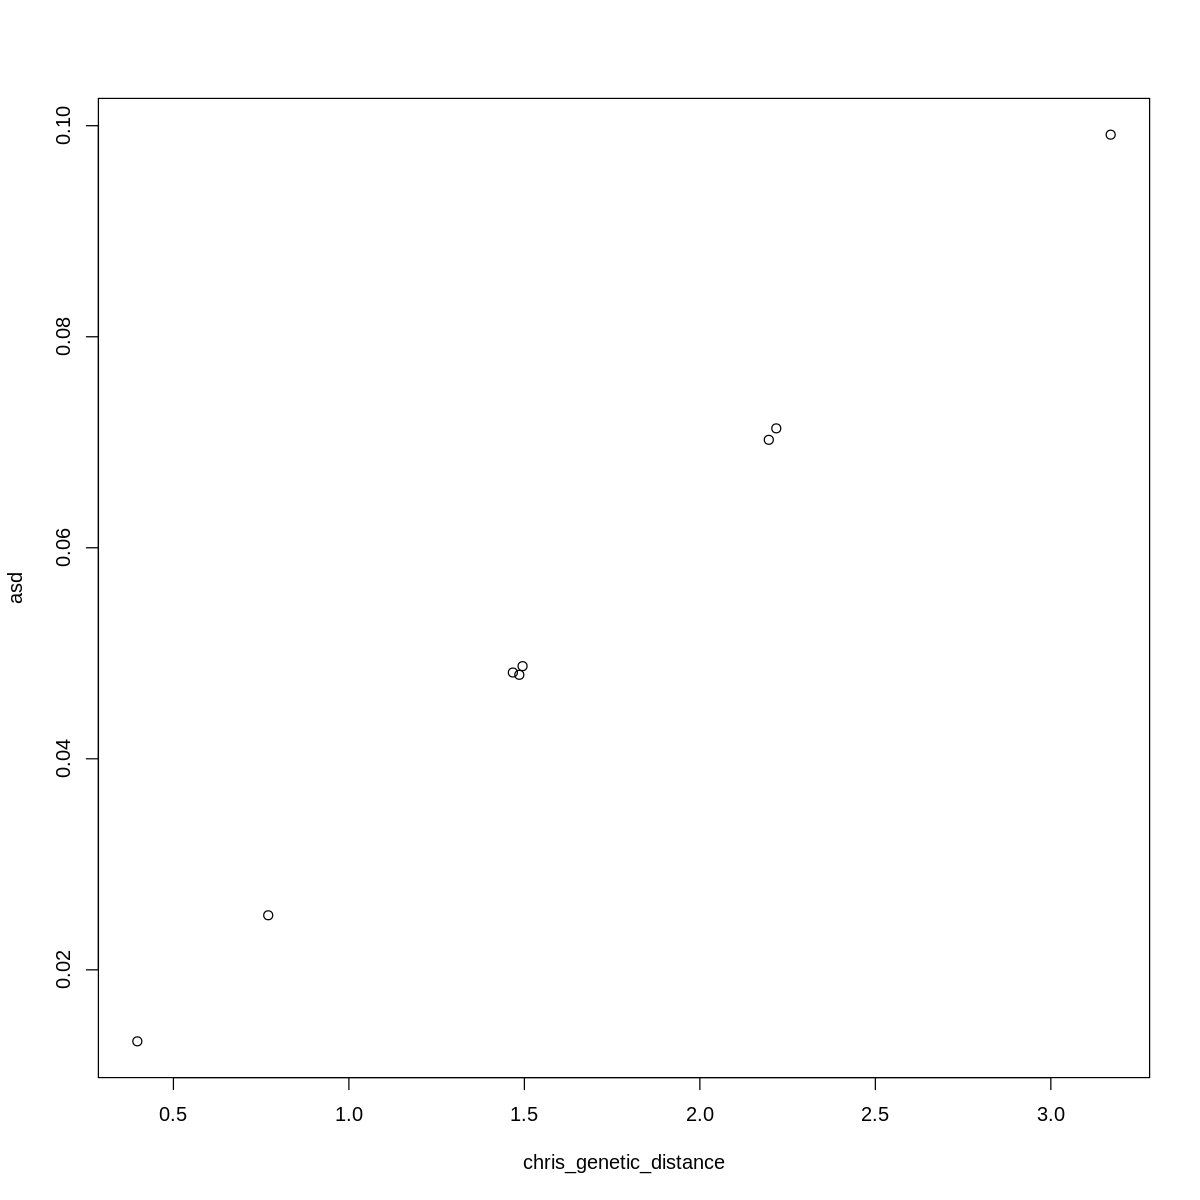

In [23]:
compare_with_chris_df=data.frame(chris_genetic_distance=c(0.397219036,0.770140009,1.49482155,1.485542939,1.467193128,2.1964435,2.217677535,3.170450964),
                                 asd=c(ads_m[which(colnames(ads_m)=="ACP"),which(colnames(ads_m)=="BFP")],ads_m[which(colnames(ads_m)=="BAP"),which(colnames(ads_m)=="CMP")],ads_m[which(colnames(ads_m)=="CCD"),which(colnames(ads_m)=="CPG")],ads_m[which(colnames(ads_m)=="ATE"),which(colnames(ads_m)=="SACE_YCR")],ads_m[which(colnames(ads_m)=="ACK"),which(colnames(ads_m)=="ACV")],ads_m[which(colnames(ads_m)=="AKE"),which(colnames(ads_m)=="BAH")],ads_m[which(colnames(ads_m)=="BAH"),which(colnames(ads_m)=="CGD")],ads_m[which(colnames(ads_m)=="ANG"),which(colnames(ads_m)=="CEI")]))

compare_with_chris_df
plot(asd~chris_genetic_distance,compare_with_chris_df)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   16.00   31.00   75.11  102.50 1010.00 

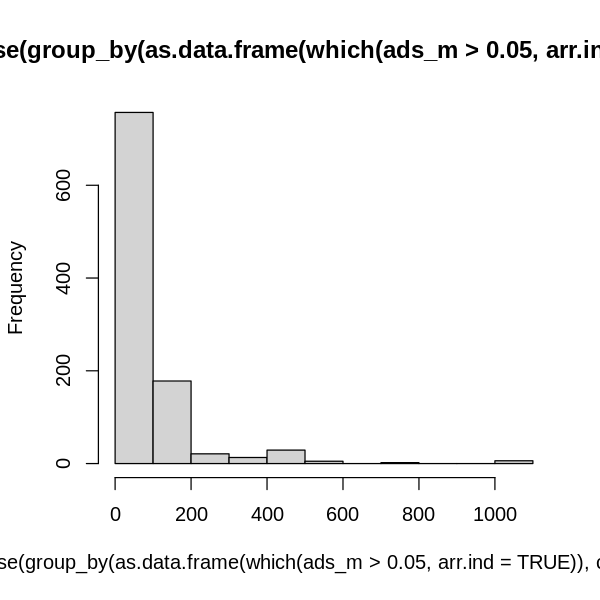

In [37]:
options(repr.plot.width=5, repr.plot.height=5)
summary(summarise(group_by(as.data.frame(which(ads_m > 0.05,arr.ind = TRUE)),col),n=n())$n)
hist(summarise(group_by(as.data.frame(which(ads_m > 0.05,arr.ind = TRUE)),col),n=n())$n)

# -> every strain can be crossed, but how to optimise crossing. I need a list of crosses where doing 10 crosses now can be subset of a sensible 100 or 500 crossings

In [45]:
distant_comparisons=as.data.frame(which(ads_m > 0.05,arr.ind = TRUE))
distant_comparisons$row=colnames(ads_m)[distant_comparisons$row]
distant_comparisons$col=colnames(ads_m)[distant_comparisons$col]
head(distant_comparisons)

,row,col
,<chr>,<chr>
1,ADF,AAA
2,AKB,AAA
3,AKC,AAA
4,AKD,AAA
5,AKE,AAA
6,AKH,AAA


In [46]:
fwrite(distant_comparisons, "~/data/TRD/distant_comparisons.csv")

In [55]:
comparisons=as.data.frame(which(ads_m > -1,arr.ind = TRUE))
comparisons$row=colnames(ads_m)[comparisons$row]
comparisons$col=colnames(ads_m)[comparisons$col]
comparisons$dist=as.list(ads_m)
fwrite(comparisons, "~/data/TRD/comparisons.csv")

In [56]:
fwrite(data.frame(ID=colnames(ads_m),x=x,y=y),"~/data/TRD/asd_2d.csv")

In [ ]:
# list of potential crosses with
# 1) distance
# 2) phylogenetic clusters being crossed (optimize for less redundancy here)
# 3) opposite homozygote genotypes (total count based on matrix)
# 4) Ease of crossing (Matrix reloaded in Yeast collection xls (home dir on babel))
# 5) long reads pre-analyzed (34 strains, Andreas)